In [1]:
!pip install pyswarm
!pip install torchswarm
!pip install pyswarms
!pip install -U scikit-multiflow

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4481 sha256=427fd1260a06506e1e7b5560b34f12519793b8b5a6a21516def16209a1b37d98
  Stored in directory: /root/.cache/pip/wheels/ac/69/65/926e9c51b9fa99757cb43e8f6b74c5e6bb8b41a038b35c2db1
Successfully built pyswarm
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 704.0 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.7 MB/s eta 0:00:00a 0:00:010m


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import tensorflow as tf
import math
import torch
from torch import nn
from torch.nn import functional as F
from torch.autograd import Variable 
from pyswarm import pso
from pyswarms.utils.functions import single_obj as fx
from torchswarm.swarmoptimizer import SwarmOptimizer
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from pyswarm import pso
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from skmultiflow.drift_detection.adwin import ADWIN
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score,accuracy_score,mean_absolute_error,mean_squared_error,r2_score,confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve,roc_auc_score,f1_score,recall_score
from sklearn.metrics import plot_precision_recall_curve,precision_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("../input/creditcardfraud/creditcard.csv",index_col=False)
data.head()
X = np.array(data.iloc[:, data.columns != 'Class'])
y = np.array(data.iloc[:, data.columns == 'Class'])
number_records_fraud = len (data[data.Class==1])
fraud_indices = np.array (data[data.Class==1].index)
normal_indices = np.array (data[data.Class==0].index)
random_normal_indices = np.random.choice (normal_indices, number_records_fraud, replace = False )
under_sample_indices = np.concatenate ([fraud_indices, random_normal_indices])
under_sample_data = data.iloc[under_sample_indices,:]
X_undersample = np.array(under_sample_data.iloc [:, under_sample_data.columns != 'Class'])
y_undersample = np.array(under_sample_data.iloc [:, under_sample_data.columns == 'Class'])


In [4]:

X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split (X_undersample,y_undersample, test_size = 0.3, random_state = 0)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
X_train_under = np.reshape(X_train_under, (X_train_under.shape[0],X_train_under.shape[1],1))
X_test_under = np.reshape(X_test_under, (X_test_under.shape[0],X_test_under.shape[1],1))

In [14]:
model = Sequential([
    #Dense(units=20, input_dim = X_train.shape[1], activation='relu'),
    LSTM(44,return_sequences=True, input_shape = (X_train_under.shape[1],1)),
    Flatten(),
    Dense(1, activation='sigmoid')])

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(X_train_under, y_train_under,batch_size=32,epochs = 10, verbose=1, workers=8, use_multiprocessing=True)
predict_prob=model.predict(X_test)
y_pred =(model.predict(X_test) > 0.5).astype("int32")
#print(classification_report(y_test, y_pred))


Epoch 1/10
22/22 [==============================] - 3s 15ms/step - loss: 0.2982 - accuracy: 0.8692
Epoch 2/10
22/22 [==============================] - 0s 16ms/step - loss: 0.1896 - accuracy: 0.9244
Epoch 3/10
22/22 [==============================] - 0s 15ms/step - loss: 0.1689 - accuracy: 0.9302
Epoch 4/10
22/22 [==============================] - 0s 15ms/step - loss: 0.1588 - accuracy: 0.9419
Epoch 5/10
22/22 [==============================] - 0s 16ms/step - loss: 0.1513 - accuracy: 0.9419
Epoch 6/10
22/22 [==============================] - 0s 15ms/step - loss: 0.1324 - accuracy: 0.9520
Epoch 7/10
22/22 [==============================] - 0s 16ms/step - loss: 0.1370 - accuracy: 0.9506
Epoch 8/10
22/22 [==============================] - 0s 16ms/step - loss: 0.1210 - accuracy: 0.9564
Epoch 9/10
22/22 [==============================] - 0s 15ms/step - loss: 0.1181 - accuracy: 0.9564
Epoch 10/10
22/22 [==============================] - 0s 15ms/step - loss: 0.1110 - accuracy: 0.9637


2022-10-12 08:27:23,796 - matplotlib.legend - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


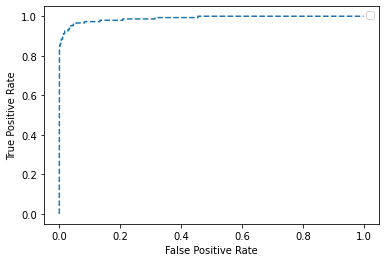

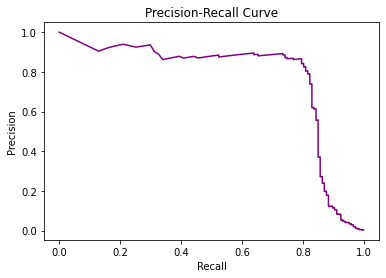

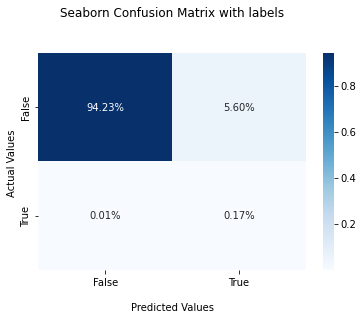

In [16]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_fpr, ns_tpr, _ = roc_curve(y_test, predict_prob)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
precision, recall, thresholds = precision_recall_curve(y_test, predict_prob)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()
cf_matrix=confusion_matrix(y_test, y_pred)

import seaborn as sns

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

1.0


model = Sequential([
    #Dense(units=20, input_dim = X_train.shape[1], activation='relu'),
    LSTM(11,return_sequences=True, input_shape = (X_train_under.shape[1],1)),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Flatten(),
    Dense(units=24,activation='relu'),
    Dense(1, activation='sigmoid')])
model.summary()

In [8]:
def mind(m):
    l=[]
    for i in range(30):
        if m[i]==1:
            l.append(i)
    return l

In [9]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
classifier = linear_model.LogisticRegression()
# this part is use the PSO and cross valation scores of logist regression
def f_per_particlerf(m, alpha):
   #alpha constant weight for trading-off classifier performance and number of features
    total_features = X_undersample.shape[1]

    
    if np.count_nonzero(m) == 0: 
         X_subset = X_undersample
    else:
        l=mind(m)
        X_subset = X_undersample[:,l]
    X_train_under, X_test_under, y_train_under, y_test_under = train_test_split (X_subset,y_undersample, test_size = 0.3, random_state = 0)
    classifier.fit(X_train_under,y_train_under)
    pred=classifier.predict(X_test_under)
    P = recall_score(pred,y_test_under)
    

    #P = scores.mean()

    print(P)
    particleScore.append(P)
    particleSize.append(X_subset.shape[1])
    #recored the each pso score and each feature size in each particle

    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))
    #Penalize if too many features are selected

    return j
def ff(x, alpha=0.9):

    n_particles = x.shape[0]
    j = [f_per_particlerf(x[i], alpha) for i in range(n_particles)]

    return np.array(j)

In [48]:
l=mind(pos)

In [10]:
from datetime import datetime as dt
import time
from pyswarms.single import GlobalBestPSO
from pyswarms.discrete import BinaryPSO
from sklearn.model_selection import cross_val_score

start = dt.now()
# to record the time 
print("Started at: ", str(start))
particleScore = list()
particleSize = list()
# Initialize swarm, arbitrary
options = {'c1': 2, 'c2': 2, 'w':0.3, 'k': 1, 'p':2}

dimensions = X_train_under.shape[1] 


optimizer =BinaryPSO(n_particles=2, dimensions=dimensions, options=options)


# Perform optimization
cost, pos = optimizer.optimize(ff,iters=5, verbose=2)
print(cost,pos)

2022-10-11 03:26:11,896 - pyswarms.discrete.binary - INFO - Optimize for 5 iters with {'c1': 2, 'c2': 2, 'w': 0.3, 'k': 1, 'p': 2}


Started at:  2022-10-11 03:26:11.889383


pyswarms.discrete.binary:   0%|          |0/5/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
pyswarms.discrete.binary:   0%|          |0/5, best_cost=0.0665/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs faile

0.9774436090225563
0.9705882352941176
0.9708029197080292
0.9637681159420289


pyswarms.discrete.binary:  40%|████      |2/5, best_cost=0.0665/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
pyswarms.discrete.binary:  40%|████      |2/5, best_cost=0.0665/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarni

0.9666666666666667
0.9274193548387096
0.9300699300699301
0.9492753623188406


pyswarms.discrete.binary:  80%|████████  |4/5, best_cost=0.0665/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
pyswarms.discrete.binary: 100%|██████████|5/5, best_cost=0.0665
2022-10-11 03:26:12,437 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.06647058823529411, best pos: [0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0]


0.9411764705882353
0.9361702127659575
0.06647058823529411 [0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0]


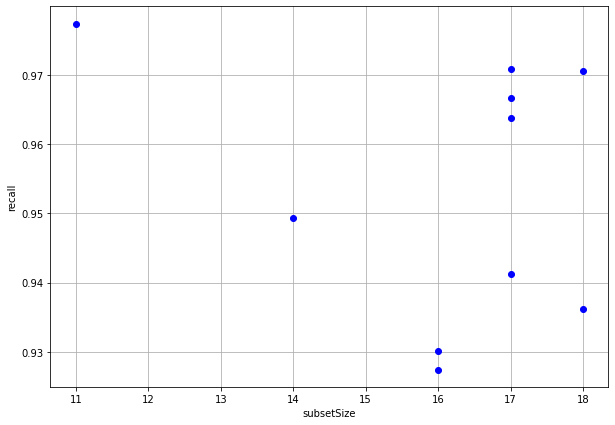

In [11]:
import matplotlib.pyplot as plt #MatPlotLib usado para desenhar o gráfico criado com o NetworkX

#iterations = list(range(1,len(optimizer.get_cost_history)+1))
plt.figure(figsize=(10,7))
#plt.xlabel('2^i classes')
plt.xlabel('subsetSize')
plt.ylabel('recall')
plt.plot(particleSize, particleScore, 'bo')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)


#plt.savefig("D:/USP/2018-1/Computação Bioinspirada/Trabalhos/iterationVSerrorRate2.png", format="PNG")


plt.show()

In [50]:
X[:,l]

array([[-1.35980713e+00,  1.37815522e+00,  4.62387778e-01, ...,
         6.69280749e-02,  1.28539358e-01,  1.33558377e-01],
       [ 1.19185711e+00,  4.48154078e-01, -8.23608088e-02, ...,
        -3.39846476e-01,  1.67170404e-01, -8.98309914e-03],
       [-1.35835406e+00,  3.79779593e-01,  1.80049938e+00, ...,
        -6.89280956e-01, -3.27641834e-01, -5.53527940e-02],
       ...,
       [ 1.91956501e+00, -5.57828125e-01,  3.03126010e+00, ...,
         6.40133881e-01,  2.65745453e-01,  4.45477214e-03],
       [-2.40440050e-01,  6.89799168e-01,  6.23707722e-01, ...,
         1.23205244e-01, -5.69158864e-01,  1.08820735e-01],
       [-5.33412522e-01, -5.06271240e-01, -6.49616686e-01, ...,
         8.79737940e-03, -4.73648704e-01, -2.41530880e-03]])

In [12]:
from tensorflow.keras import backend as K
def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val
X_train, X_test, y_train, y_test = train_test_split (X[:,l],y, test_size = 0.3, random_state = 0)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split (X_undersample,y_undersample, test_size = 0.3, random_state = 0)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
X_train_under = np.reshape(X_train_under, (X_train_under.shape[0],X_train_under.shape[1],1))
X_test_under = np.reshape(X_test_under, (X_test_under.shape[0],X_test_under.shape[1],1))
# x is the list which Hyperparameters we want to optimization
def model_design(x): 
  
    #print(f"Units : {int(x[0])}, Learning Rate : {x[2]:.2f}")
    K.clear_session()
    input_dim = X_train_under.shape[1]

    #model = Sequential()
    #model.add(LSTM(int(x[0]),return_sequences=True, input_shape = (X_train.shape[1], 1)))
    model = Sequential([
    #Dense(units=20, input_dim = X_train.shape[1], activation='relu'),
    LSTM(int(x[0]),return_sequences=True, input_shape = (X_train_under.shape[1],1)),
    Dense(units=int(x[2]),activation='relu'),
    Dropout(0.5),
    Dense(units=int(x[3]),activation='relu'),
    Flatten(),
    Dense(units=int(x[4]),activation='relu'),
    Dense(1, activation='sigmoid')])
    # here I think maybe could accelerate the learning rate choose ,it doesn't matter to delet below if 
    if x[1]< 0.003:
        learning_rate = 0.001
    elif x[1]< 0.0075:
        learning_rate = 0.005
    elif x[1]< 0.015:
        learning_rate = 0.01
    elif x[1]< 0.035:
        learning_rate = 0.02
    elif x[1]< 0.075:
        learning_rate = 0.05
    elif x[1]< 0.125:
        learning_rate = 0.1
    elif x[1]< 0.175:
        learning_rate = 0.15
    else:
        learning_rate = 0.2
    print(f"Units : {int(x[0])}, Learning Rate : {learning_rate:.2f}")
    
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=[f1_metric])
    return model

In [14]:
EarlyStopper = EarlyStopping(patience=4, monitor='val_loss', mode='min')
count = 0
def best_model(x):
    print(x)
    model = model_design(x)

    history = model.fit(X_train_under, y_train_under,batch_size=32,epochs = 30, verbose=1, workers=8, use_multiprocessing=True)
    y_pred =(model.predict(X_test) > 0.5).astype("int32")
    #train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    #print(f"Train_Accuracy:{train_acc} Train Loss: {train_loss}")
    recall=f1_score(y_pred,y_test)
    #test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    #print(f"Test Accuracy:{test_acc} Test Loss: {test_loss}")
    #y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
    print(classification_report(y_test, y_pred))
    #matrix = confusion_matrix(y_test, y_pred)
    return (1-recall)

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=["accuracy"])
model.fit(X_train_under, y_train_under,batch_size=32,epochs = 100, verbose=1, workers=8, use_multiprocessing=True)

In [15]:
lb=[20,0.01,10,10,10]
ub=[50,0.02,30,30,30]
# here lb and ub is the upper bound and lower bound of Hyperparameters
xopt, fopt = pso(best_model, lb, ub)
print ("Best position"+str(xopt))
print ("Loss:" + str(fopt))

[3.91590326e+01 1.38383143e-02 1.37525019e+01 1.94531978e+01
 1.26123283e+01]


2022-10-11 03:26:25.989447: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Units : 39, Learning Rate : 0.01
Epoch 1/30


2022-10-11 03:26:26.459933: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


22/22 [==============================] - 3s 17ms/step - loss: 0.3535 - f1_metric: 0.8472
Epoch 2/30
22/22 [==============================] - 0s 17ms/step - loss: 0.2416 - f1_metric: 0.9099
Epoch 3/30
22/22 [==============================] - 0s 17ms/step - loss: 0.1801 - f1_metric: 0.9211
Epoch 4/30
10/22 [============>.................] - ETA: 0s - loss: 0.1264 - f1_metric: 0.9472

KeyboardInterrupt: 

In [ ]:
'''X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split (X_undersample,y_undersample, test_size = 0.3, random_state = 0)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
X_train_under = np.reshape(X_train_under, (X_train_under.shape[0],X_train_under.shape[1],1))
X_test_under = np.reshape(X_test_under, (X_test_under.shape[0],X_test_under.shape[1],1))'''

In [16]:
#start = dt.now()
# to record the time 
#print("Started at: ", str(start))
model = Sequential([
    #Dense(units=20, input_dim = X_train.shape[1], activation='relu'),
    LSTM(44,return_sequences=True, input_shape = (X_train_under.shape[1],1)),
    Dense(units=25,activation='relu'),
    Dropout(0.5),
    Dense(units=17,activation='relu'),
    Flatten(),
    Dense(units=28,activation='relu'),
    Dense(1, activation='sigmoid')])

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=[f1_metric])
model.fit(X_train_under, y_train_under,batch_size=32,epochs = 30, verbose=1, workers=8, use_multiprocessing=True)
y_pred =(model.predict(X_test) > 0.5).astype("int32")
y_pred_train=(model.predict(X_train_under) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
print(classification_report(y_pred_train, y_train_under))


Epoch 1/30
22/22 [==============================] - 3s 18ms/step - loss: 0.3293 - f1_metric: 0.8610
Epoch 2/30
22/22 [==============================] - 0s 18ms/step - loss: 0.2507 - f1_metric: 0.9074
Epoch 3/30
22/22 [==============================] - 0s 19ms/step - loss: 0.1964 - f1_metric: 0.9234
Epoch 4/30
22/22 [==============================] - 0s 18ms/step - loss: 0.1772 - f1_metric: 0.9335
Epoch 5/30
22/22 [==============================] - 0s 18ms/step - loss: 0.1645 - f1_metric: 0.9315
Epoch 6/30
22/22 [==============================] - 0s 18ms/step - loss: 0.1611 - f1_metric: 0.9361
Epoch 7/30
22/22 [==============================] - 0s 18ms/step - loss: 0.1514 - f1_metric: 0.9466
Epoch 8/30
22/22 [==============================] - 0s 17ms/step - loss: 0.1418 - f1_metric: 0.9410
Epoch 9/30
22/22 [==============================] - 0s 18ms/step - loss: 0.1498 - f1_metric: 0.9395
Epoch 10/30
22/22 [==============================] - 0s 18ms/step - loss: 0.1506 - f1_metric: 0.9378

In [23]:
print(classification_report(y_test, y_pred))
print(classification_report(y_pred_train, y_train_under))
#y_val_cat_prob=model.predict_proba(y_test)
predict_prob=model.predict(X_test)


              precision    recall  f1-score   support

           0       1.00      0.92      0.96     85296
           1       0.02      0.96      0.04       147

    accuracy                           0.92     85443
   macro avg       0.51      0.94      0.50     85443
weighted avg       1.00      0.92      0.95     85443

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       338
           1       0.98      0.97      0.98       350

    accuracy                           0.98       688
   macro avg       0.98      0.98      0.98       688
weighted avg       0.98      0.98      0.98       688



NameError: name 'ns_probs' is not defined

2022-10-11 03:37:24,585 - matplotlib.legend - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


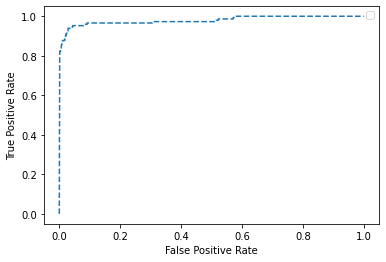

In [29]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_fpr, ns_tpr, _ = roc_curve(y_test, predict_prob)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

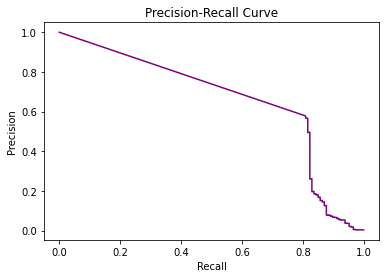

In [32]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
precision, recall, thresholds = precision_recall_curve(y_test, predict_prob)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

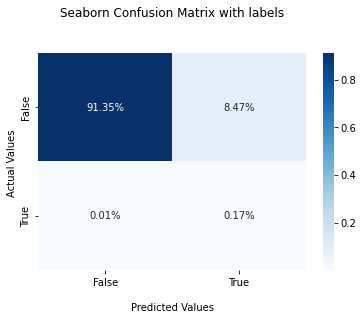

In [30]:
cf_matrix=confusion_matrix(y_test, y_pred)

import seaborn as sns

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [51]:
X_train, X_test, y_train, y_test = train_test_split (X[:,l],y, test_size = 0.3, random_state = 0)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
model = Sequential([
    #Dense(units=20, input_dim = X_train.shape[1], activation='relu'),
    LSTM(10,return_sequences=True, input_shape = (X_train_under.shape[1],1)),
    Flatten(),
    Dense(units=10,activation='relu'),
    Dense(1, activation='sigmoid')])

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(X_train, y_train,batch_size=32,epochs = 3, verbose=1, workers=8, use_multiprocessing=True)
y_pred =(model.predict(X_test) > 0.5).astype("int32")
y_pred_train=(model.predict(X_train_under) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
print(classification_report(y_pred_train, y_train_under))
predict_prob=model.predict(X_test)
ns_fpr, ns_tpr, _ = roc_curve(y_test, predict_prob)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

precision, recall, thresholds = precision_recall_curve(y_test, predict_prob)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

cf_matrix=confusion_matrix(y_test, y_pred)

import seaborn as sns

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

2022-10-11 04:41:51,638 - tensorflow - WARNING - Model was constructed with shape (None, 30, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 30, 1), dtype=tf.float32, name='lstm_13_input'), name='lstm_13_input', description="created by layer 'lstm_13_input'"), but it was called on an input with incompatible shape (None, 18, 1).


Epoch 1/3


ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /opt/conda/lib/python3.7/site-packages/keras/engine/functional.py:415 call
        inputs, training=training, mask=mask)
    /opt/conda/lib/python3.7/site-packages/keras/engine/functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/conda/lib/python3.7/site-packages/keras/engine/input_spec.py:254 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer dense_43 is incompatible with the layer: expected axis -1 of input shape to have value 300 but received input with shape (None, 180)


In [46]:
pos


NameError: name 'mid' is not defined

In [54]:
X_train, X_test, y_train, y_test = train_test_split (X[:,l],y, test_size = 0.3, random_state = 0)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
model = Sequential([
    #Dense(units=20, input_dim = X_train.shape[1], activation='relu'),
    LSTM(44,return_sequences=True, input_shape = (X_train.shape[1],1)),
    Dense(units=25,activation='relu'),
    Dropout(0.5),
    Dense(units=17,activation='relu'),
    Flatten(),
    Dense(units=28,activation='relu'),
    Dense(1, activation='sigmoid')])

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=[f1_metric])
model.fit(X_train, y_train,batch_size=32,epochs = 5, verbose=1, workers=8, use_multiprocessing=True)


Epoch 1/5
6231/6231 [==============================] - 85s 13ms/step - loss: 0.0084 - f1_metric: 0.0263
Epoch 2/5
6231/6231 [==============================] - 84s 13ms/step - loss: 0.0050 - f1_metric: 0.0391
Epoch 3/5
6231/6231 [==============================] - 83s 13ms/step - loss: 0.0058 - f1_metric: 0.0388
Epoch 4/5
6231/6231 [==============================] - 84s 13ms/step - loss: 0.0050 - f1_metric: 0.0406
Epoch 5/5
6231/6231 [==============================] - 82s 13ms/step - loss: 0.0051 - f1_metric: 0.0398


2022-10-11 04:50:28,443 - tensorflow - WARNING - Model was constructed with shape (None, 18, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 18, 1), dtype=tf.float32, name='lstm_16_input'), name='lstm_16_input', description="created by layer 'lstm_16_input'"), but it was called on an input with incompatible shape (None, 30, 1).


ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1586 predict_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1569 run_step  **
        outputs = model.predict_step(data)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1537 predict_step
        return self(x, training=False)
    /opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /opt/conda/lib/python3.7/site-packages/keras/engine/functional.py:415 call
        inputs, training=training, mask=mask)
    /opt/conda/lib/python3.7/site-packages/keras/engine/functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/conda/lib/python3.7/site-packages/keras/engine/input_spec.py:254 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer dense_55 is incompatible with the layer: expected axis -1 of input shape to have value 306 but received input with shape (None, 510)


In [56]:
y_pred =(model.predict(X_train) > 0.5).astype("int32")
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199019
           1       0.81      0.81      0.81       345

    accuracy                           1.00    199364
   macro avg       0.90      0.90      0.90    199364
weighted avg       1.00      1.00      1.00    199364



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.82      0.80      0.81       147

    accuracy                           1.00     85443
   macro avg       0.91      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443



2022-10-11 04:51:40,503 - matplotlib.legend - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


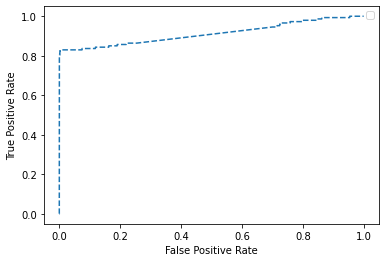

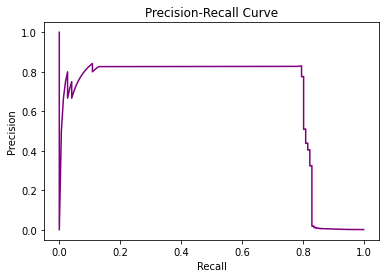

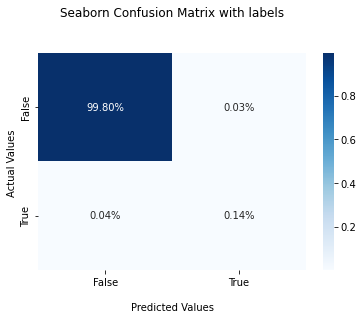

In [55]:
y_pred =(model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
predict_prob=model.predict(X_test)
ns_fpr, ns_tpr, _ = roc_curve(y_test, predict_prob)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

precision, recall, thresholds = precision_recall_curve(y_test, predict_prob)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

cf_matrix=confusion_matrix(y_test, y_pred)

import seaborn as sns

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()